In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos el dataset

In [68]:
dataset = pd.read_csv('day_wise2.csv')
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
0,2020-01-22,555,17,28,510,6
1,2020-01-23,654,18,30,606,8
2,2020-01-24,941,26,36,879,9
3,2020-01-25,1434,42,39,1353,11
4,2020-01-26,2118,56,52,2010,13
...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,187
184,2020-07-24,15791645,639650,8939705,6212290,187
185,2020-07-25,16047190,644517,9158743,6243930,187
186,2020-07-26,16251796,648621,9293464,6309711,187


In [69]:
indexDates = dataset[ (dataset['Date'] != '2020-01-27') & (dataset['Date'] != '2020-02-27') & (dataset['Date'] != '2020-03-27') & (dataset['Date'] != '2020-04-27') & (dataset['Date'] != '2020-05-27') & (dataset['Date'] != '2020-06-27') & (dataset['Date'] != '2020-07-27')].index
dataset.drop(indexDates, inplace = True)
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
5,2020-01-27,2927,82,61,2784,16
36,2020-02-27,82034,2810,31919,47305,51
65,2020-03-27,603066,28318,128508,446240,176
96,2020-04-27,3032850,215511,852382,1964957,184
126,2020-05-27,5699664,357119,2297613,3044932,187
157,2020-06-27,9955597,499268,4981808,4474521,187
187,2020-07-27,16480485,654036,9468087,6358362,187


In [70]:
dataset['Date'] = dataset['Date'].map({'2020-01-27': 1, '2020-02-27': 2, '2020-03-27': 3, '2020-04-27': 4, '2020-05-27': 5, '2020-06-27': 6,'2020-07-27': 7}, na_action=None)
#dataset.rename({'Date':'Month'}, axis = 1)
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
5,1,2927,82,61,2784,16
36,2,82034,2810,31919,47305,51
65,3,603066,28318,128508,446240,176
96,4,3032850,215511,852382,1964957,184
126,5,5699664,357119,2297613,3044932,187
157,6,9955597,499268,4981808,4474521,187
187,7,16480485,654036,9468087,6358362,187


Graficamos la data

In [71]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 2:3].values

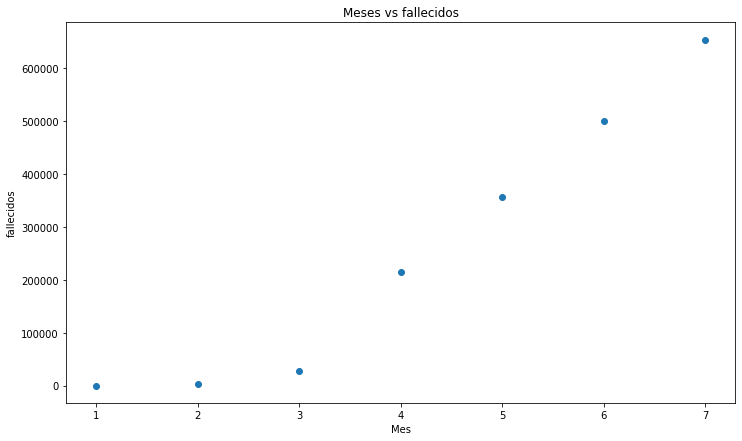

In [72]:
plt.figure(figsize=(12,7))
plt.scatter(X,y)
plt.title('Meses vs fallecidos')
plt.xlabel('Mes')
plt.ylabel('fallecidos')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3, 1)
(3, 1)
(4, 1)
(4, 1)


Implementamos el Algoritmo

In [78]:
#Se define el algoritmo a Utilizar
from sklearn import linear_model
lr = linear_model.LinearRegression()
#Se entrena el modelo
lr.fit(X_train, y_train)
#Predecimos los valores de Y de respecto a los valores de X
Y_pred = lr.predict(X_test)
print(Y_pred)

[[418190.46153846]
 [ 77260.76923077]
 [503422.88461538]
 [162493.19230769]]


In [79]:
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [Y_pred]})
df

,Actual,Predicted
0,"[[499268], [2810], [654036], [28318]]","[[418190.46153846156], [77260.76923076916], [5..."


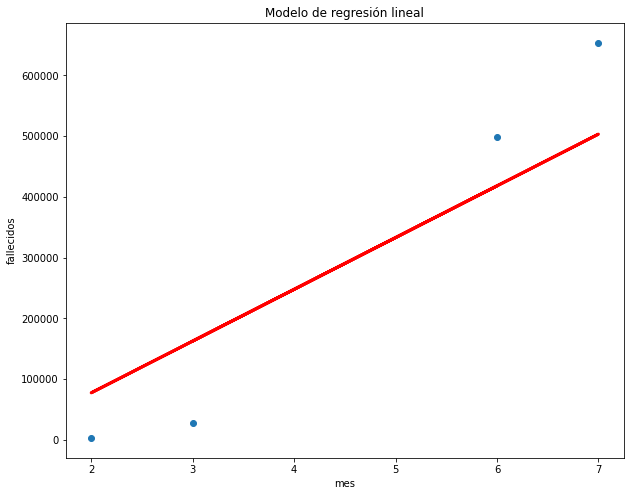

In [80]:
#Graficamos los datos junto con el modelo
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title("Modelo de regresión lineal")
plt.xlabel("mes")
plt.ylabel('fallecidos')
plt.show()

In [81]:
print("Valor de la pendiente o coeficiente a: ")
print(lr.coef_)
print("Valor de la intersección o coeficiente b: ")
print(lr.intercept_)
print("Precisión del modelo")
print(lr.score(X_train, y_train))

Valor de la pendiente o coeficiente a: 
[[85232.42307692]]
Valor de la intersección o coeficiente b: 
[-93204.07692308]
Precisión del modelo
0.9739133786356232
